In [176]:
import pandas as pd #data processing
from pandas import DataFrame
import numpy as np #linear algebra
import matplotlib.pyplot as plt #datavisualization
import seaborn as sns

In [177]:
df = pd.read_csv('HW1_Data.csv')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31891 entries, 0 to 31890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   revenue   31891 non-null  float64
 1   outcalls  31891 non-null  float64
 2   incalls   31891 non-null  float64
 3   months    31891 non-null  int64  
 4   eqpdays   31891 non-null  int64  
 5   webcap    31891 non-null  int64  
 6   marryyes  31891 non-null  int64  
 7   travel    31891 non-null  int64  
 8   pcown     31891 non-null  int64  
 9   creditcd  31891 non-null  int64  
 10  retcalls  31891 non-null  int64  
 11  churndep  31891 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.9 MB


In [179]:
df

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,83.53,20.00,1.00,31,745,1,0,0,0,0,4,1
1,29.99,0.00,0.00,52,1441,0,0,0,1,1,3,1
2,37.75,2.67,0.00,25,572,0,0,0,1,1,3,1
3,5.25,0.00,0.00,45,1354,0,0,0,0,0,2,1
4,42.71,8.67,0.00,27,224,1,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
31886,185.30,178.67,171.00,41,44,1,1,0,1,1,0,0
31887,167.59,141.33,283.67,17,28,1,0,0,0,0,0,0
31888,151.49,128.67,175.33,47,9,1,1,0,0,1,0,0
31889,125.42,90.00,336.67,18,79,1,0,0,0,0,0,0


# Data Exploration 

In [51]:
df.describe()
#eqpdays and revenue have negative values. I will remove any negative values.

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
count,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000
mean,58.665179,24.951385,8.065277,18.761908,391.222633,0.894704,0.363175,0.057163,0.184817,0.676931,0.044088,0.497162
std,44.163859,34.790147,16.610589,9.548019,254.998478,0.306939,0.480922,0.232158,0.388155,0.467656,0.224552,0.500000
min,-5.860000,0.000000,0.000000,6.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.450000,3.000000,0.000000,11.000000,212.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.380000,13.330000,2.000000,17.000000,341.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,71.040000,33.330000,9.000000,24.000000,530.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,861.110000,610.330000,404.000000,60.000000,1812.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Remove rows based on conditions
#### I realized that equipment days and revenue contain negative numbers in the dataset. In business terms, it doesn't make sense to have negative revenue and negative days, so I will remove these values.

In [227]:
df = df[(df['eqpdays']>=0) & (df['revenue']>=0)]

### Descriptive Statistics (Categorical & Numerical Variables)

In [228]:
# Categorical variable 
categorical_column = ['webcap','marryyes','travel','pcown','creditcd','churndep']
for i in categorical_column:
    print(df[i].value_counts())

1    28491
0     3353
Name: webcap, dtype: int64
0    20279
1    11565
Name: marryyes, dtype: int64
0    30021
1     1823
Name: travel, dtype: int64
0    25955
1     5889
Name: pcown, dtype: int64
1    21562
0    10282
Name: creditcd, dtype: int64
0    16006
1    15838
Name: churndep, dtype: int64


In [229]:
# Numerical variable
numeric_column = ['revenue','outcalls','incalls','months','eqpdays','retcalls']
df[numeric_column].describe()

,revenue,outcalls,incalls,months,eqpdays,retcalls
count,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000,31844.000000
mean,58.622173,24.926872,8.052027,18.757097,391.789222,0.043964
std,44.101060,34.747400,16.543853,9.546107,254.746976,0.224189
min,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
25%,33.440000,3.000000,0.000000,11.000000,212.000000,0.000000
50%,48.335000,13.330000,2.000000,16.000000,341.000000,0.000000
75%,70.970000,33.330000,9.000000,24.000000,530.000000,0.000000
max,861.110000,610.330000,404.000000,60.000000,1812.000000,4.000000


### See Missing Values

In [230]:
df.isna().sum()
# no missing value 

revenue     0
outcalls    0
incalls     0
months      0
eqpdays     0
webcap      0
marryyes    0
travel      0
pcown       0
creditcd    0
retcalls    0
churndep    0
dtype: int64

### Correlation Matrix

<AxesSubplot:>

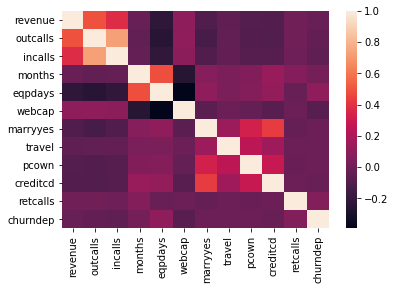

In [231]:
# see if any variables are relatively more correlated to target variable

corr = df.corr()

sns.heatmap(corr,xticklabels = corr.columns, yticklabels=corr.columns)

In [232]:
#Calculate correlation coefficient 
r = np.corrcoef(df['eqpdays'], df['churndep'])
r[0,1]
#11% correlation between eqpdays and churndep

0.11246737096286445

## 2. Why is the decision tree an appropriate model for this problem?

### The problem we have is a binomial classification problem; it classifies consumer churn to 0 (no churn) and 1 (churn). Therefore, we know that we need to use a supervised method (one of which is a decision tree) to solve the problem as we have a target variable in mind (customer churn). As the decision tree branches out, the model learns decision rules inferred from prior data. At the end it makes a decision with respect to its target variable, which in this situation would be whether the customer will / will not terminate his/her contract. 

# Decision Tree Model & Evaluation

### Step 1: Assign target variable (customer churn)

In [180]:
# assign label to churndep
X = df.drop(['churndep'],axis=1)
y = df['churndep']

### Step 2: Split data into testing and training dataset

In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

### Step 3: Train decision tree model using entropy with no max depth 

In [183]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf_en=DecisionTreeClassifier(criterion='entropy')
clf_en=clf_en.fit(X_train,y_train)

### Step 4: Test decision tree model

In [184]:
#predict test result with model 
y_pred_en = clf_en.predict(X_test)

### Step 5 - 1: Evaluate Model - Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


Confusion matrix, without normalization
[[2552 2129]
 [2242 2645]]


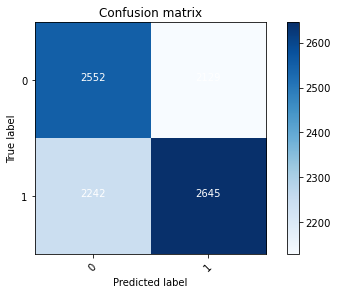

In [253]:
cm = confusion_matrix(y_test,y_pred_en)

plot_confusion_matrix(cm,classes=['0','1'])

### Step 5-2: Evaluate Model - Classification Report

In [43]:
print(classification_report(y_test, y_pred_en))


              precision    recall  f1-score   support

           0       0.53      0.54      0.54      4681
           1       0.55      0.54      0.54      4887

    accuracy                           0.54      9568
   macro avg       0.54      0.54      0.54      9568
weighted avg       0.54      0.54      0.54      9568



### Step 5-3: Evaluate Model - Accuracy

In [44]:
Accuracy = accuracy_score(y_test,y_pred_en)
print(Accuracy)

0.540133779264214


### Step 5-4: Evaluate Model - Precision 

In [47]:
Precision = precision_score(y_test,y_pred_en)
print(Precision)

0.5484544695071011


### Step 5-5: Evaluate Model - Recall

In [48]:
Recall = recall_score(y_test,y_pred_en)
print(Recall)

0.5373439738080622


### Step 5-6: Evaluate Model - F1

In [49]:
F1 = f1_score(y_test,y_pred_en)
print(F1)

0.5428423772609818


### Step 5-7: Evaluate Model - Classification Error

In [50]:
Classification_Error = 1 - Accuracy 
print(Classification_Error)

0.459866220735786


# Decision Tree with other parameter values

### Change 1 - criteria: entropy , max depth: 3

In [187]:
clf_3=DecisionTreeClassifier(criterion='entropy',max_depth = 3)
clf_3=clf_3.fit(X_train,y_train)
y_pred_3 = clf_3.predict(X_test)

### Change 2 - Set criterion to gini index, max depth 3

In [259]:
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth = 3)
clf_gini=clf_gini.fit(X_train,y_train)
y_pred_gini = clf_gini.predict(X_test)

### Change 3 - criteria: entropy, max depth: 5

In [215]:
clf_5=DecisionTreeClassifier(criterion='entropy',max_depth = 5)
clf_5=clf_5.fit(X_train,y_train)
y_pred_5 = clf_10.predict(X_test)

# Evaluation

### Model 1 - criteria: entropy , max depth: 3

In [255]:
cm_3 = confusion_matrix(y_test,y_pred_3)

Accuracy = accuracy_score(y_test,y_pred_3)
print('Accuracy: ',Accuracy)

Precision = precision_score(y_test,y_pred_3)
print('Precision: ',Precision)

Recall = recall_score(y_test,y_pred_3)
print('Recall:',Recall)

F1 = f1_score(y_test,y_pred_3)
print('F1:',F1)


Accuracy:  0.5977215719063546
Precision:  0.5829073482428115
Recall: 0.7466748516472274
F1: 0.6547053018749439


### Model 2 - criteria: gini, max depth: 3

In [260]:
cm_gini = confusion_matrix(y_test,y_pred_gini)

Accuracy = accuracy_score(y_test,y_pred_gini)
print('Accuracy: ',Accuracy)

Precision = precision_score(y_test,y_pred_gini)
print('Precision: ',Precision)

Recall = recall_score(y_test,y_pred_gini)
print('Recall:',Recall)

F1 = f1_score(y_test,y_pred_gini)
print('F1:',F1)


Accuracy:  0.5977215719063546
Precision:  0.5829073482428115
Recall: 0.7466748516472274
F1: 0.6547053018749439


### Model 3 - criteria: entropy, max depth: 5

In [258]:
cm_5 = confusion_matrix(y_test,y_pred_5)

Accuracy = accuracy_score(y_test,y_pred_5)
print('Accuracy: ',Accuracy)

Precision = precision_score(y_test,y_pred_5)
print('Precision: ',Precision)

Recall = recall_score(y_test,y_pred_5)
print('Recall:',Recall)

F1 = f1_score(y_test,y_pred_5)
print('F1:',F1)

Accuracy:  0.5896739130434783
Precision:  0.5785259029253146
Recall: 0.7243707796193984
F1: 0.6432854806469198


## Visualization

In [221]:
features = ['webcap','marryyes','travel','pcown','creditcd','revenue','outcalls','incalls','months','eqpdays','retcalls']

### Visualization of Model 1 - criteria: entropy , max depth: 3

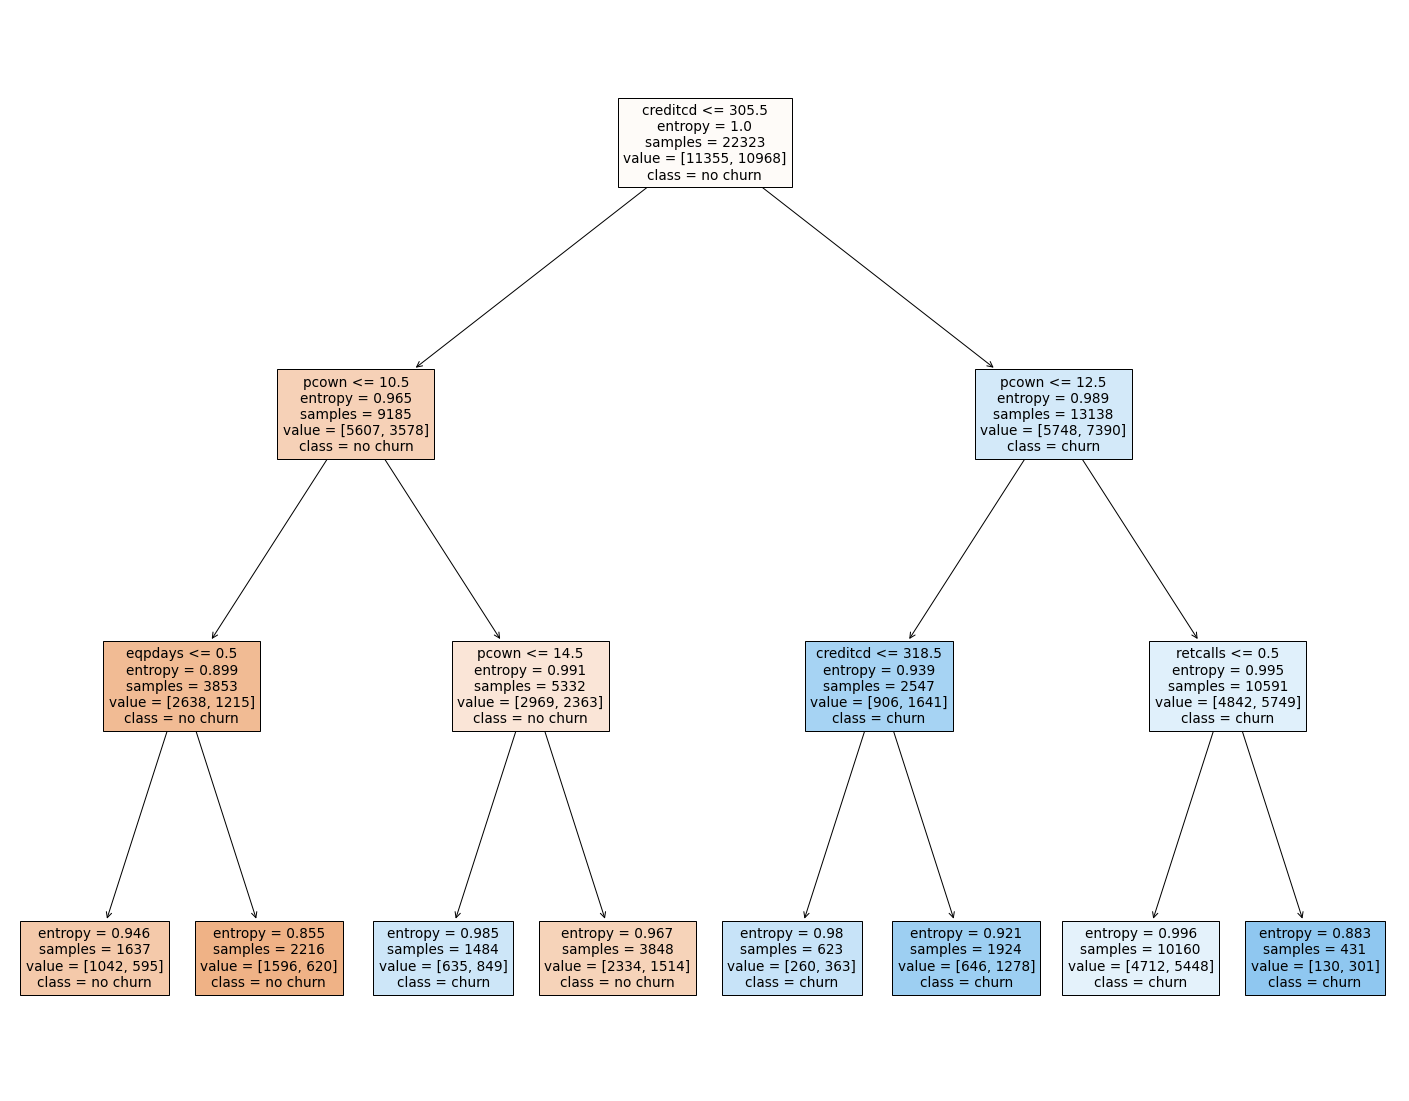

In [261]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_3, 
                   feature_names=features,  
                   class_names=['no churn','churn'],
                   filled=True)


### Visualization of Model 2 - criteria: gini, max depth 3

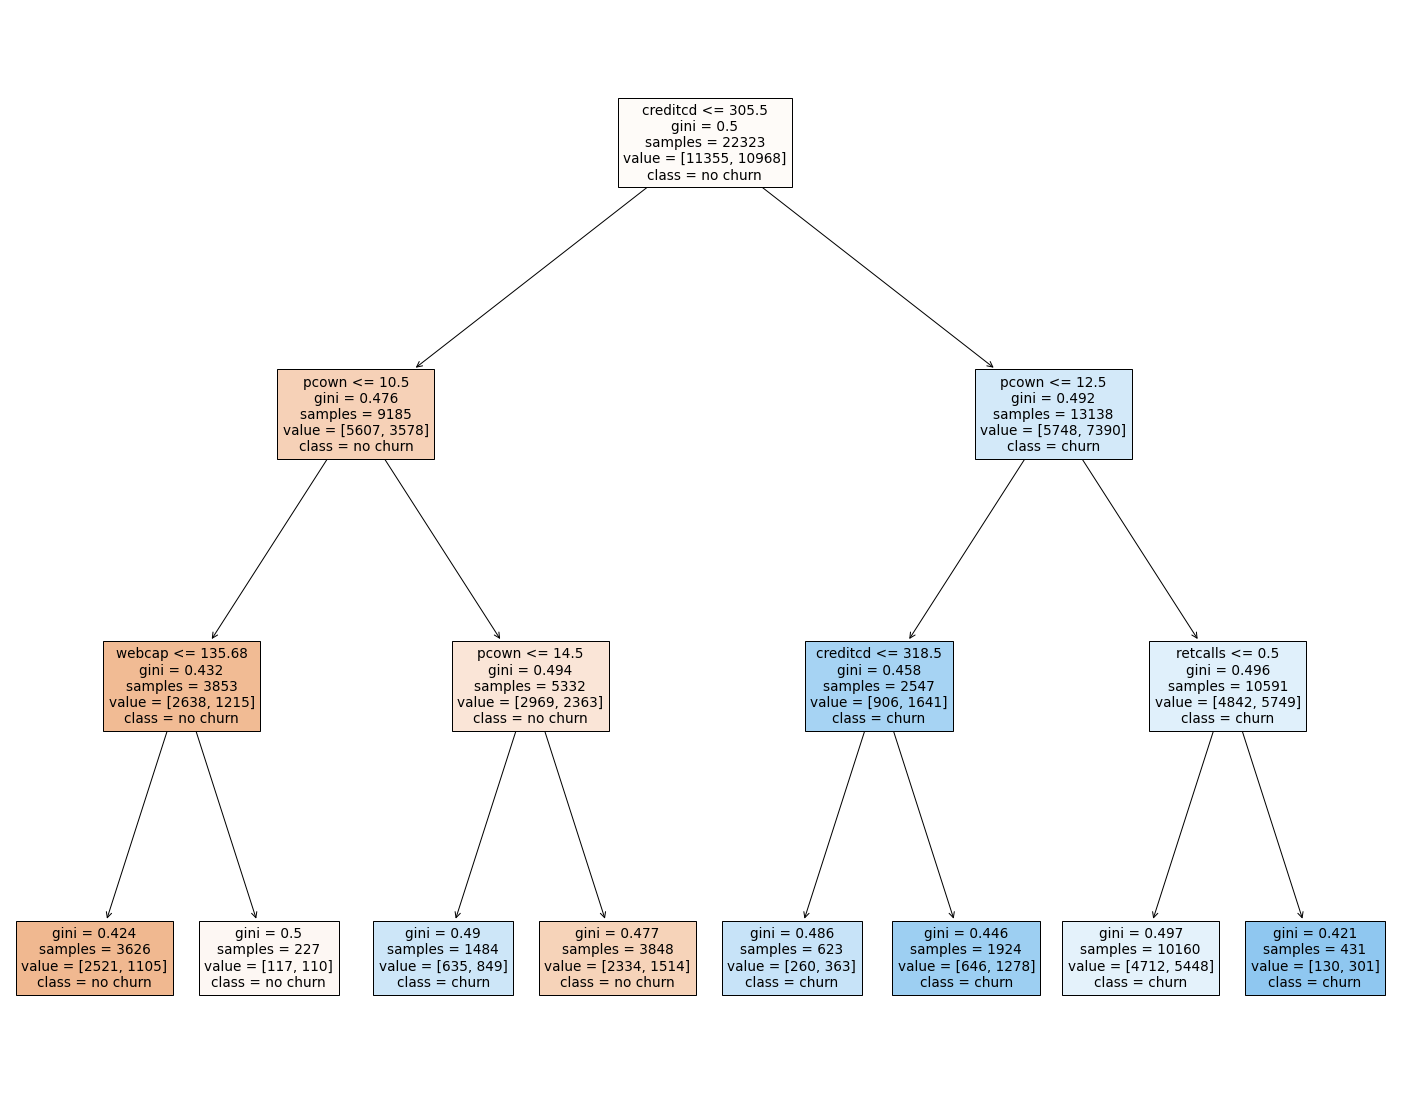

In [220]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_gini, 
                   feature_names=features,  
                   class_names=['no churn','churn'],
                   filled=True)

### Visualization of Model 3 - criteria: entropy, max depth: 5

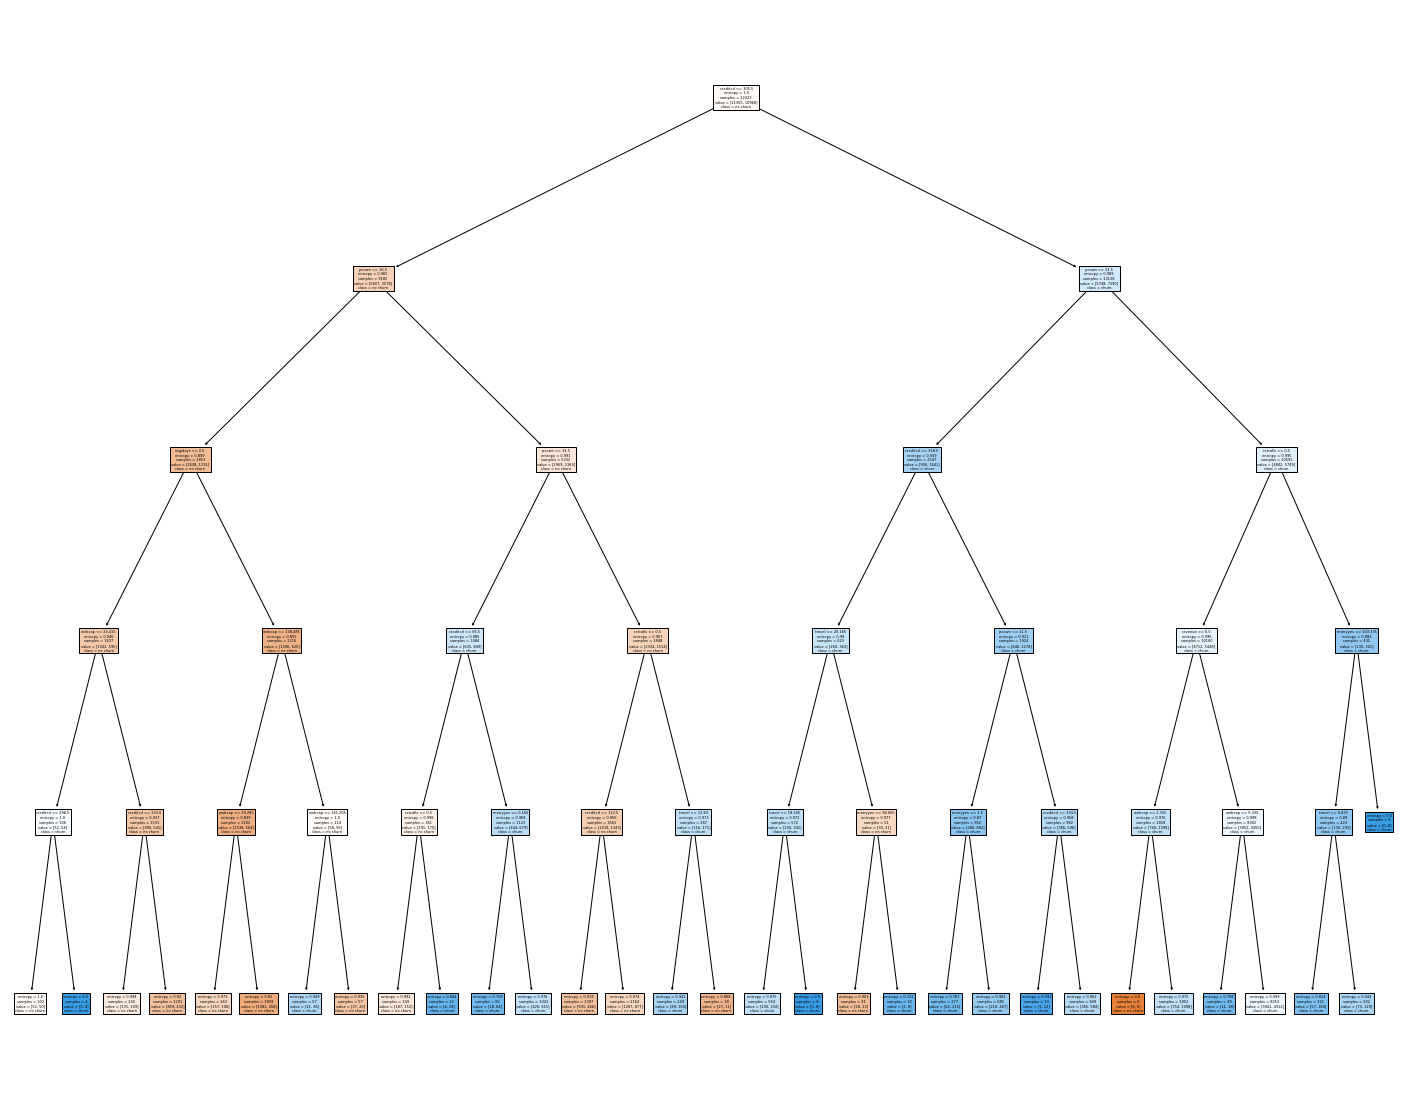

In [217]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_5, 
                   feature_names=features,  
                   class_names=['no churn','churn'],
                   filled=True)
